In [1]:
%matplotlib inline
import os, pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
E = pd.read_csv('merged_table.csv')
#first five instances of merged table E
E.head()

,Name,Sale Price,Category,Author,ISBN10,Pages,Publisher,Language,Dimensions,Weight,Rating
0,Origin,20.35,Books > Literature & Fiction > Action & Adventure,"Brown, Dan",385514239,717.0,Doubleday; 1st Edition edition,English,6.3 x 1.6 x 9.6 inches,1.7 pounds,4.0
1,We Were the Lucky Ones,8.97,Books > Literature & Fiction > Genre Fiction,Georgia Hunter,399563091,416.0,Penguin Books; Reprint edition,English,5.4 x 0.9 x 8.2 inches,11.4 ounces,4.0
2,Fahrenheit 451 Paperback,9.99,Books > Politics & Social Sciences > Politics ...,Ray Bradbury,1451673310,256.0,Simon & Schuster; Reissue edition,English,5.5 x 0.9 x 8.4 inches,6.2 ounces,4.0
3,"Sing, Unburied, Sing",21.24,Books > Literature & Fiction > Genre Fiction,Jesmyn Ward,1501126067,304.0,Scribner; First Edition/First Printing edition,English,5.5 x 1.2 x 8.4 inches,1 pounds,4.0
4,Altered Carbon Takeshi Kovacs,12.98,Books > Science Fiction & Fantasy > Science Fi...,"Morgan, Richard K.",345457684,375.0,Del Rey; 1st edition,English,6.1 x 0.9 x 9.2 inches,12.8 ounces,4.0


In [21]:
sum_rating = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
total_rating = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for id,row in E.iterrows():
   
    price = row['Sale Price']
    rating = row['Rating']
    i = int(price / 10)
    if np.isnan(rating):
        continue
    sum_rating[i] += rating
    total_rating[i] +=1


In [22]:
sum_rating

[902.0, 813.0, 108.0, 21.0, 13.0, 0, 0, 0, 0, 4.0]

In [23]:
total_rating

[232, 209, 28, 5, 3, 0, 0, 0, 0, 1]

In [24]:
y_rating = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(len(sum_rating)):
    if sum_rating[i] == 0:
        y_rating[i] = 0
    else:
        y_rating[i] = sum_rating[i] / total_rating[i]

In [25]:
y_rating

[3.8879310344827585,
 3.889952153110048,
 3.857142857142857,
 4.2,
 4.333333333333333,
 0,
 0,
 0,
 0,
 4.0]

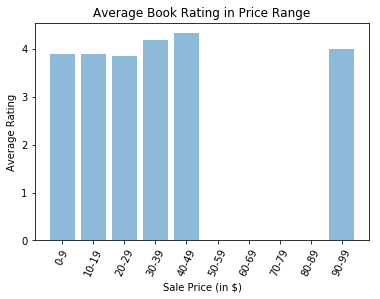

In [32]:
# plotting avg rating in a price range
y = y_rating
x = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
plt.bar(np.arange(len(x)), y, align = 'center', alpha=0.5)
plt.xticks(np.arange(len(x)), x, rotation = 65)
# plt.yticks(np.arange(0,230,20))
plt.ylabel('Average Rating')
plt.xlabel('Sale Price (in $)')
plt.title('Average Book Rating in Price Range')
plt.savefig('./figures/price_vs_rating.jpg', bbox_inches = 'tight')
plt.show()

In [38]:
#Lower price higher rating books
price_threshold = 5
rating_low = 4
#airports[(airports.iso_region == 'US-CA') & (airports.type == 'seaplane_base')]
E[(E['Sale Price'] < price_threshold) & (E['Rating'] >= rating_low)]

,Name,Sale Price,Category,Author,ISBN10,Pages,Publisher,Language,Dimensions,Weight,Rating
39,The Medical Examiner,4.49,"Books > Mystery, Thriller & Suspense > Thrille...",James Patterson Maxine Paetro,316504823,144.0,BookShots,English,5 x 0.4 x 7 inches,5 ounces,4.0
264,And Then There Were None Mass Market Paperback,4.99,"Books > Mystery, Thriller & Suspense > Thrille...","Christie, Agatha",62073486,300.0,William Morrow; Reissue edition,English,4.2 x 0.8 x 6.8 inches,5.6 ounces,4.0
349,Manhunt,4.99,"Books > Mystery, Thriller & Suspense > Thrille...",James Patterson James O. Born,316473499,144.0,BookShots,English,5 x 0.5 x 7 inches,3.5 ounces,4.0
403,Leopard's Blood A Leopard Novel,4.71,Books > Science Fiction & Fantasy > Fantasy,Christine Feehan,399583971,416.0,Berkley,English,4.2 x 1.1 x 6.8 inches,7 ounces,4.0
409,Thursdays at Eight,4.78,Books > Literature & Fiction > Genre Fiction,Debbie Macomber,778330443,384.0,MIRA,English,4.2 x 1 x 6.6 inches,6.4 ounces,4.0
410,Jane Eyre Bantam Classics,2.86,Books > Literature & Fiction > Classics,"Bronte, Charlotte",553211404,493.0,Bantam Classics,English,4.2 x 0.8 x 6.9 inches,8.8 ounces,4.0
413,Shadows in the Night The Finnegan Connection,4.31,"Books > Mystery, Thriller & Suspense > Thrille...","Graham, Heather",1335721312,256.0,Harlequin Intrigue,English,4.2 x 0.6 x 6.6 inches,4.3 ounces,4.0
456,His Secret Son The Westmoreland Legacy,3.21,Books > Literature & Fiction > United States,"Jackson, Brenda",373838840,224.0,Harlequin Desire,English,4.1 x 0.6 x 6.6 inches,3.8 ounces,4.0


In [53]:
auth_rating = {}
for i, row in E.iterrows():
    #print(auth)
    auth = row['Author']
    #print(auth)
    auth = auth.lower()
    if ',' in auth:
        names = auth.split(',')
        auth = names[1].strip() + " " + names[0]
    #auth = auth.replace(',', '')
    
    print(auth)
    if auth in auth_rating:
        auth_rating[auth]['occ'] +=1
        auth_rating[auth]['rating'] += row['Rating']
        if row['Rating'] > auth_rating[auth]['max']:
            auth_rating[auth]['max'] = row['Rating']
    else:
        auth_rating[auth] = {}
        auth_rating[auth]['occ'] =1
        auth_rating[auth]['rating'] = row['Rating']
        auth_rating[auth]['max'] = row['Rating']
    #break

dan brown
georgia hunter
ray bradbury
jesmyn ward
richard k. morgan
andy weir
gail honeyman
celeste ng
john grisham
william golding
greer hendricks sarah pekkanen
harper lee
margaret atwood
jojo moyes
jason matthews
brandon sanderson
aldous huxley
stephen king
shari lapena
jonathan kellerman
liv constantine
ruth ware
liane moriarty
george saunders
anthony doerr
jason matthews
andrzej sapkowski
ernest cline
louise penny
louise penny
patrick rothfuss
marshall karp james patterson
annerice rice
liane moriarty
james patterson
lee child
john le carré
stephen king richard chizmar
stephen king
james patterson maxine paetro
ursula k. le guin
terri blackstock
liane moriarty
e. l. james
stephen king owen king
douglas adams
douglas adams
pierce brown
john grisham
david mamet
ursula k. le guin
philip k. dick
patrick rothfuss
neil gaiman
karen cleveland
william kent krueger
mark z. danielewski
robert harris
amy bloom
e.l. james
ruth hogan
andrzej sapkowski david french
brian k vaughan cliff chiang


In [55]:
len(auth_rating)

268

In [56]:
auth_rating

{'abbi waxman': {'max': 4.0, 'occ': 1, 'rating': 4.0},
 'adrian tchaikovsky': {'max': 4.0, 'occ': 1, 'rating': 4.0},
 'agatha christie': {'max': 4.0, 'occ': 5, 'rating': 20.0},
 'alan bradley': {'max': 4.0, 'occ': 3, 'rating': 12.0},
 'aldous huxley': {'max': 4.0, 'occ': 1, 'rating': 4.0},
 'alexander mccall smith': {'max': 4.0, 'occ': 1, 'rating': 4.0},
 'alexandra ripley': {'max': 4.0, 'occ': 1, 'rating': 4.0},
 'alice hoffman': {'max': 4.0, 'occ': 1, 'rating': 4.0},
 'allen eskens': {'max': 4.0, 'occ': 2, 'rating': 8.0},
 'allison brennan': {'max': 4.0, 'occ': 1, 'rating': 4.0},
 'amor towles': {'max': 4.0, 'occ': 1, 'rating': 4.0},
 'amy bloom': {'max': 3.0, 'occ': 1, 'rating': 3.0},
 'andrew gross': {'max': 4.0, 'occ': 1, 'rating': 4.0},
 'andrzej sapkowski': {'max': 4.0, 'occ': 4, 'rating': 16.0},
 'andrzej sapkowski david french': {'max': 4.0, 'occ': 4, 'rating': 16.0},
 'andy weir': {'max': 3.0, 'occ': 1, 'rating': 3.0},
 'ann cleeves': {'max': 4.0, 'occ': 1, 'rating': 4.0},
 '

In [64]:
#consistently highly rated authors
for k,v in auth_rating.items():
    if (v['max'] == 4 and v['occ'] > 5):
        print (k)
        print(v)
        print()

brandon sanderson
{'occ': 7, 'rating': 28.0, 'max': 4.0}

stephen king
{'occ': 14, 'rating': 56.0, 'max': 4.0}

louise penny
{'occ': 9, 'rating': 36.0, 'max': 4.0}

james patterson
{'occ': 7, 'rating': 28.0, 'max': 4.0}

lee child
{'occ': 11, 'rating': 42.0, 'max': 4.0}

nora roberts
{'occ': 11, 'rating': 44.0, 'max': 4.0}

vince flynn
{'occ': 6, 'rating': 24.0, 'max': 4.0}

craig johnson
{'occ': 6, 'rating': 24.0, 'max': 4.0}

diana gabaldon
{'occ': 6, 'rating': 24.0, 'max': 4.0}

janet evanovich
{'occ': 8, 'rating': 32.0, 'max': 4.0}

patricia briggs
{'occ': 9, 'rating': 36.0, 'max': 4.0}

